In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape#a 3d image 

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train=y_train.reshape(-1,) #ytrain has outputs in tho form of 2d rray so we converted it to 1d array

In [6]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train.shape

(50000,)

In [8]:
classes=["airplane",										
"automobile",							
"bird",								
"cat",										
"deer",										
"dog",										
"frog",										
"horse",										
"ship",										
"truck",										
]

In [9]:
classes[0]

'airplane'

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

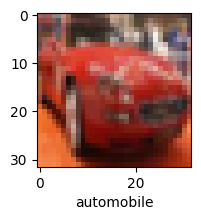

In [11]:
plot_sample(X_train,y_train,5)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [20]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

ann=models.Sequential([
    tf.keras.Input(shape=(32,32,3)),  # ✅ Preferred way
    tf.keras.layers.Flatten(),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
ann.fit(X_train, y_train, epochs=5, validation_split=0.2,batch_size=100)


Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 74s 176ms/step - accuracy: 0.2486 - loss: 2.6254 - val_accuracy: 0.3668 - val_loss: 1.7517
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 72s 181ms/step - accuracy: 0.3861 - loss: 1.7107 - val_accuracy: 0.4222 - val_loss: 1.6461
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 72s 179ms/step - accuracy: 0.4208 - loss: 1.6191 - val_accuracy: 0.4350 - val_loss: 1.6020
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 68s 169ms/step - accuracy: 0.4459 - loss: 1.5541 - val_accuracy: 0.4387 - val_loss: 1.5704
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 71s 177ms/step - accuracy: 0.4594 - loss: 1.5070 - val_accuracy: 0.4550 - val_loss: 1.5267


In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [32]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.60      0.48      0.53      1000
           1       0.63      0.48      0.55      1000
           2       0.36      0.19      0.25      1000
           3       0.37      0.31      0.34      1000
           4       0.37      0.56      0.45      1000
           5       0.39      0.31      0.35      1000
           6       0.46      0.59      0.51      1000
           7       0.61      0.42      0.50      1000
           8       0.53      0.69      0.60      1000
           9       0.44      0.64      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
cnn=models.Sequential([

    #CNN
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    #DENSE
    tf.keras.layers.Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
cnn.fit(X_train, y_train, epochs=10, validation_split=0.2,batch_size=100)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.3389 - loss: 1.8218 - val_accuracy: 0.5159 - val_loss: 1.3601
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5424 - loss: 1.2872 - val_accuracy: 0.5939 - val_loss: 1.1654
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.6073 - loss: 1.1178 - val_accuracy: 0.6178 - val_loss: 1.0998
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6388 - loss: 1.0273 - val_accuracy: 0.6483 - val_loss: 1.0219
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.6689 - loss: 0.9453 - val_accuracy: 0.6415 - val_loss: 1.0429
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.6901 - loss: 0.8904 - val_accuracy: 0.6632 - val_loss: 0.9859
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.7092 - loss: 0.8358 - val_accuracy: 0.6785 - val_loss: 0.9350
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7253 - loss: 0.7876 - 

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [34]:
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.70      0.76      0.72      1000
           1       0.80      0.81      0.81      1000
           2       0.63      0.54      0.58      1000
           3       0.44      0.61      0.51      1000
           4       0.69      0.54      0.60      1000
           5       0.61      0.54      0.58      1000
           6       0.81      0.74      0.77      1000
           7       0.61      0.84      0.71      1000
           8       0.87      0.70      0.78      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

